In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from utils import plot_chr_in_splits, load_annotations, get_labels, plot_seq_overlap
import os

TASK = 'cpg_methylation'
LABEL_DEPTH = 7

In [2]:
annotations = load_annotations(TASK)
annotations

,chromosome,start,end,strand,label,split
0,1,134839,135351,+,"0,1,2,3,4,5,6",train
1,1,134946,135458,+,"0,1,2,3,4,5,6",train
2,1,134951,135463,+,"0,1,2,3,4,5,6",train
3,1,139110,139622,+,"0,1,2,3,4,5,6",train
4,1,180816,181328,+,"0,1,2,3,4,5,6",train
...,...,...,...,...,...,...
959034,Y,6535336,6535848,-,"0,1,2,3,4,5,6",train
959035,Y,6535372,6535884,+,"0,1,2,3,4,5,6",train
959036,Y,6744500,6745012,+,4,train
959037,Y,10223411,10223923,-,NaN,train


### General statistics

In [3]:
annotations['length'] = annotations['end'] - annotations['start']
annotations['length'].describe()

count    959039.0
mean        512.0
std           0.0
min         512.0
25%         512.0
50%         512.0
75%         512.0
max         512.0
Name: length, dtype: float64

In [4]:
annotations['split'].value_counts()/len(annotations)*100

split
train    77.483293
valid    11.440306
test     11.076400
Name: count, dtype: float64

In [5]:
annotations['strand'].value_counts()/len(annotations)*100

strand
-    53.463623
+    46.536377
Name: count, dtype: float64

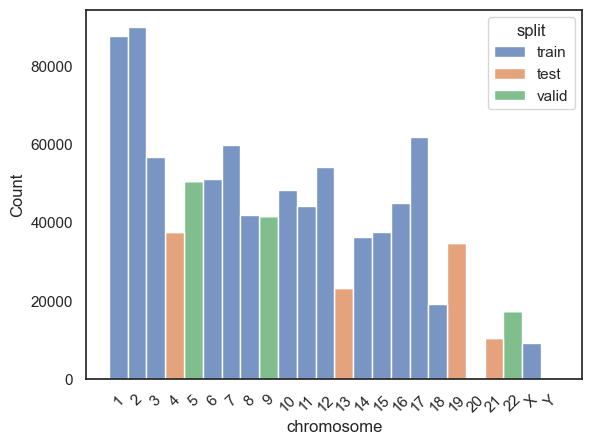

In [6]:
# How are chromosomes distributed into splits? 

plot_chr_in_splits(annotations)

Number of annotations with overlaps: 385512.0
Total number of samples: 743095
Percentage of annotations with overlaps: 51.88%


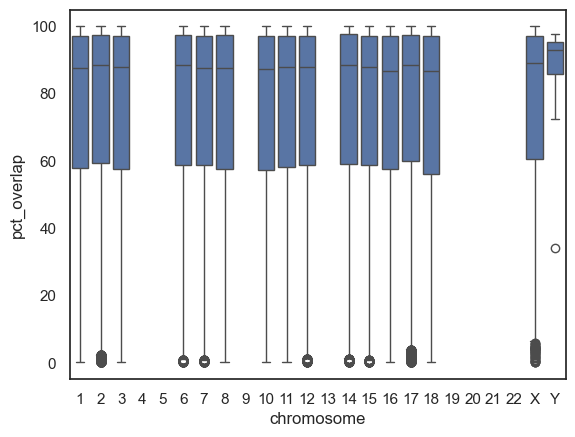

In [7]:
train_annotations = annotations[annotations['split'] == 'train'].copy()
overlap = plot_seq_overlap(train_annotations)

In [8]:
overlap.describe()

,length,overlap,pct_overlap
count,385512.0,385512.000000,385512.000000
mean,512.0,381.866707,74.583341
std,0.0,143.256282,27.979743
min,512.0,1.000000,0.195312
25%,512.0,299.000000,58.398438
50%,512.0,449.000000,87.695312
75%,512.0,497.000000,97.070312
max,512.0,511.000000,99.804688


In [7]:
label_df, total_labels = get_labels(annotations, LABEL_DEPTH)
total_labels

label_0    799345
label_1    801170
label_2    800118
label_3    781154
label_4    877331
label_5    801175
label_6    804389
dtype: int64

In [9]:
total_labels/total_labels.sum() * 100

label_0    14.111030
label_1    14.143248
label_2    14.124676
label_3    13.789900
label_4    15.487736
label_5    14.143336
label_6    14.200073
dtype: float64